# 3b. Logistic Regression 2 - Serve Statistics by Surface

#### The steps from script 3a are repeated here, using the additional variable of "court surface". The goal is to see if the correlation between each serve statistic and likelihood of winning a match varied by court surface.

# Table of Content
## 1. Load and Verify Data
## 2. Data Preparation (Create a 'win' target variable)
## 3. Export Dataframe (for use on Tableau)

# Step 1: Load and Verify Data

In [1]:
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Set Path
path = r'/Users/tristansavella/Desktop/Important Things/Data Analytics/CareerFoundry/Data Immersion/Achievement 6/Master Folder ATP/02 Data'

In [3]:
#Import df_matchstats
df_matchstats = pd.read_pickle(os.path.join(path, 'Prepared Data','df_matchstats.pkl'))

In [4]:
# Set the option to display all rows
pd.set_option('display.max_rows', None)

# Set the option to display all columns
pd.set_option('display.max_columns', None)

# Step 2: Prepare the data by creating a 'win' target variable.

In [5]:
# Create the 'win' target variable (1 for winner, 0 for loser)
# Combine winner and loser statistics in a single DataFrame
winners = df_matchstats[['w_%1stServesIn', 'w_%1stWon', 'w_%2ndWon', 'surface']].copy()
winners['win'] = 1
winners.columns = ['%1stServesIn', '%1stWon', '%2ndWon', 'surface', 'win']

In [6]:
losers = df_matchstats[['l_%1stServesIn', 'l_%1stWon', 'l_%2ndWon', 'surface']].copy()
losers['win'] = 0
losers.columns = ['%1stServesIn', '%1stWon', '%2ndWon', 'surface', 'win']

In [7]:
combined_df = pd.concat([winners, losers], ignore_index=True)

In [8]:
# Define the features and target variable
features = ['%1stServesIn', '%1stWon', '%2ndWon']
target = 'win'

In [9]:
# Initialize a DataFrame to store the coefficients
coefficients_df = pd.DataFrame()


In [10]:
# Get unique surfaces
surfaces = combined_df['surface'].unique()

In [11]:
# Iterate over each surface type and train a separate logistic regression model
for surface in surfaces:
    # Filter the dataset for the current surface
    df_surface = combined_df[combined_df['surface'] == surface]

    # Check if there are enough data points to train the model
    if df_surface.shape[0] < 10:  # Arbitrary threshold for minimal data points
        continue

    # Define the features and target variable for the current surface
    X = df_surface[features]
    y = df_surface[target]

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the logistic regression model
    log_reg = LogisticRegression(max_iter=1000)
    log_reg.fit(X_train, y_train)

    # Get the coefficients of the logistic regression model
    coeffs = log_reg.coef_[0]

    # Create a DataFrame for the coefficients of the current surface
    surface_coeffs_df = pd.DataFrame({
        'Feature': features,
        'Coefficient': coeffs,
        'Surface': surface
    })

    # Append the coefficients to the main DataFrame
    coefficients_df = pd.concat([coefficients_df, surface_coeffs_df], ignore_index=True)

   

In [12]:
# Display the coefficients DataFrame
print(coefficients_df)


         Feature  Coefficient Surface
0   %1stServesIn     0.045088    Hard
1        %1stWon     0.147502    Hard
2        %2ndWon     0.103018    Hard
3   %1stServesIn     0.049480    Clay
4        %1stWon     0.155528    Clay
5        %2ndWon     0.104507    Clay
6   %1stServesIn     0.042310   Grass
7        %1stWon     0.153907   Grass
8        %2ndWon     0.101215   Grass
9   %1stServesIn     0.040727  Carpet
10       %1stWon     0.136917  Carpet
11       %2ndWon     0.087267  Carpet


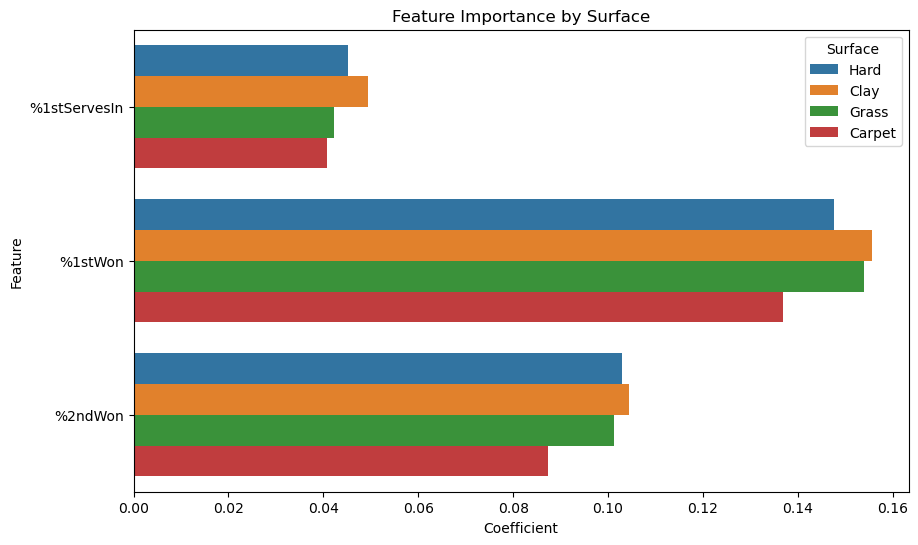

In [13]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', hue='Surface', data=coefficients_df)
plt.title('Feature Importance by Surface')
plt.show()

# Step 3. Export Coefficients Dataframe

In [14]:
# Save the coefficients DataFrame to a CSV file for use in Tableau
coefficients_df.to_csv(os.path.join(path,'Prepared Data CSV','coefficients_df.csv'))